In [1]:
import numpy as np
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

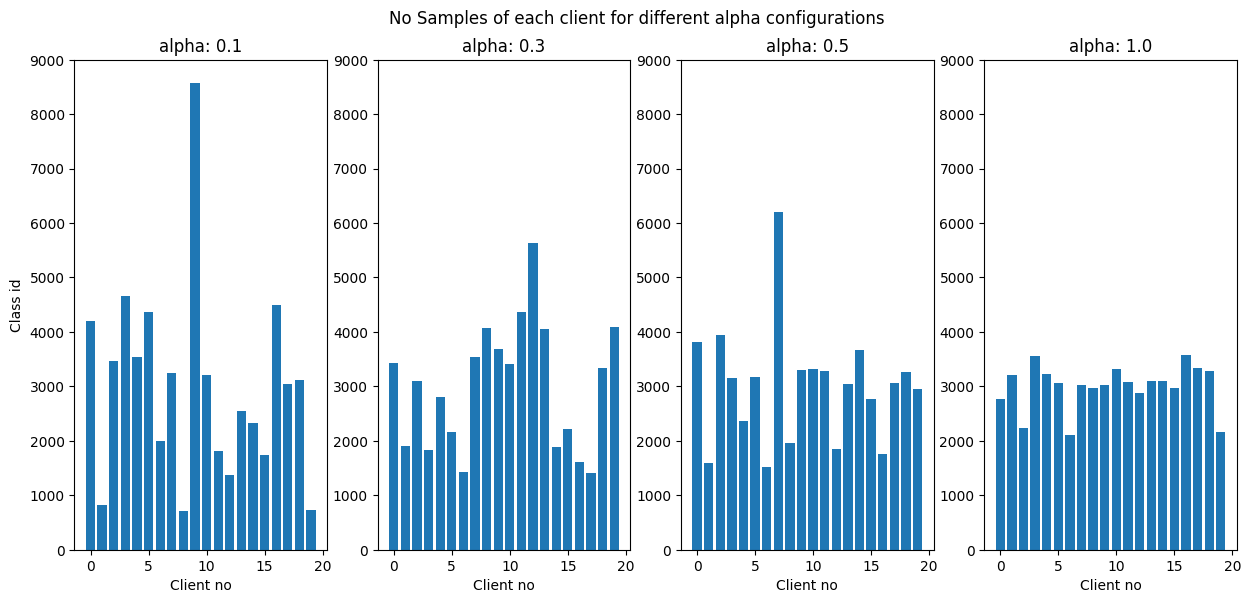

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

plt.subplots_adjust(left=None, bottom=-0.1, right=None, top=None, wspace=None, hspace=None)

for i, alpha in enumerate(["01", "03", "05", "10"]):

    conf = json.load(open(f"../data/alpha/Cifar10_NIID_20c_a{alpha}/config.json", "r"))
    data = [dict(zip(np.array(cli)[:,0], np.array(cli)[:,1])) for cli in conf["Size of samples for labels in clients"]]

    idx = 0
    counts = []
    for client in conf['Size of samples for labels in clients']:
        count = np.sum(np.asarray(client), axis=0)[1]
        counts.append(count)
        idx +=1


    h = counts
    # print(i, alpha)
    # plt.subplot(1,4,i+1)
    ax = axes[i]
    ax.bar(np.arange(len(h)),h)
    ax.set_title(f"alpha: {float(alpha)/10}")
    ax.set_ylim([0, 9000])
    ax.set_xlabel("Client no")
    if i == 0: ax.set_ylabel("Class id")

fig.suptitle("No Samples of each client for different alpha configurations")
plt.show()

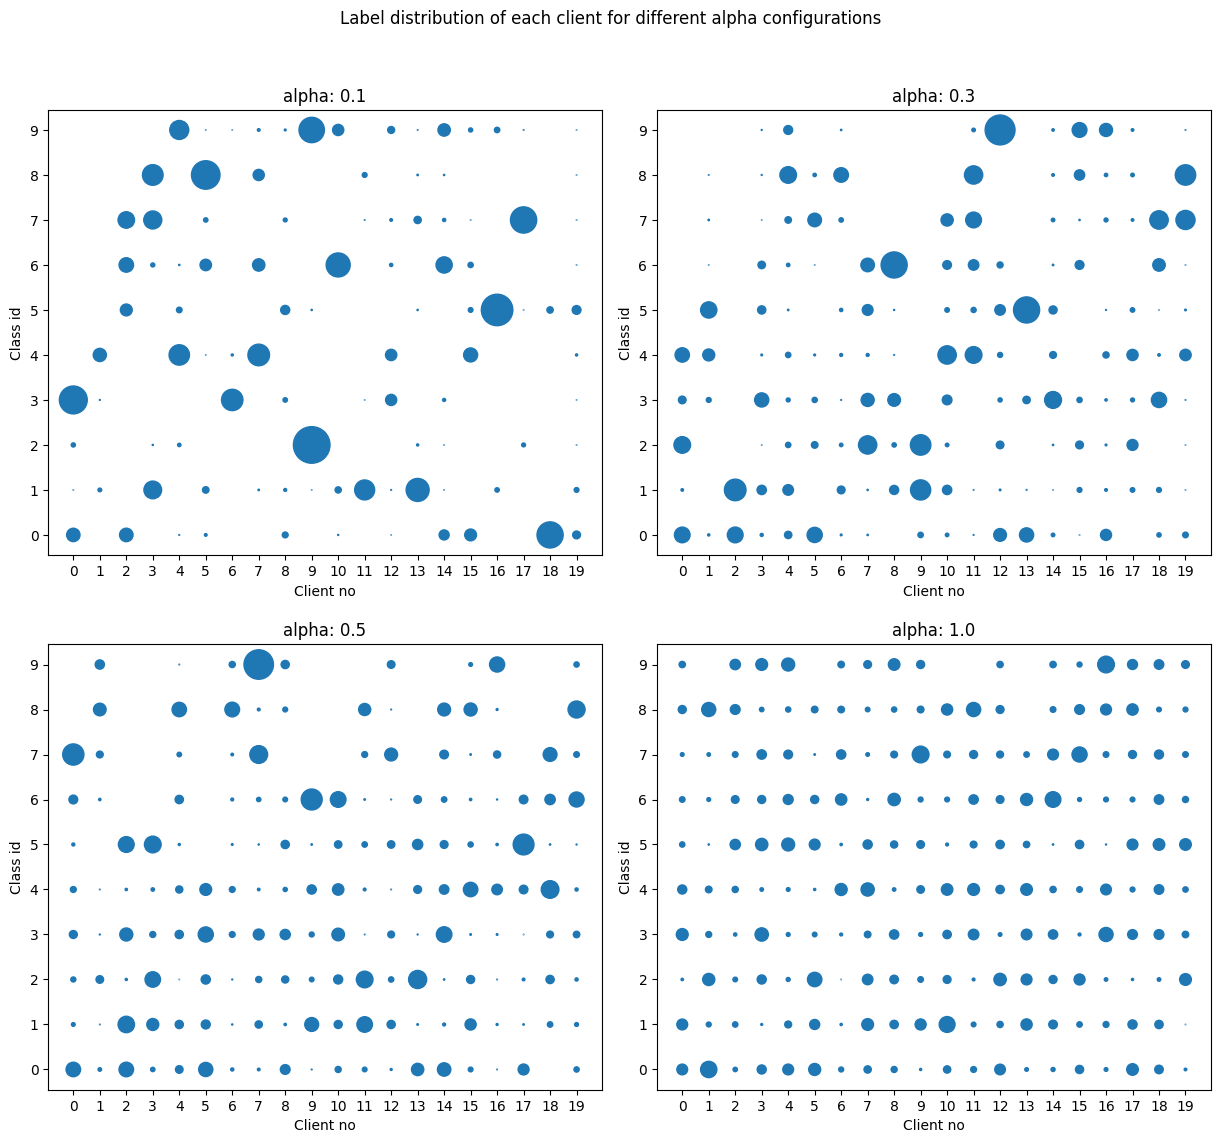

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plt.subplots_adjust(left=None, bottom=-0.1, right=None, top=None, wspace=0.1, hspace=None)

plt.setp(
    axes,
    xticks=np.arange(20),
    yticks=np.arange(10)
    )

for i, alpha in enumerate(["01", "03", "05", "10"]):

    conf = json.load(open(f"../data/alpha/Cifar10_NIID_20c_a{alpha}/config.json", "r"))
    data = [dict(zip(np.array(cli)[:,0], np.array(cli)[:,1])) for cli in conf["Size of samples for labels in clients"]]

    idx = 0
    counts = []
    for client in conf['Size of samples for labels in clients']:
        count = np.sum(np.asarray(client), axis=0)[1]
        counts.append(count)
        idx +=1


    h = counts

    df = pd.DataFrame(data).replace(np.nan, 0)
    x = np.array(np.meshgrid(np.arange(20),np.arange(10))).T.reshape(-1,2)[:,0]
    y = np.array(np.meshgrid(np.arange(20),np.arange(10))).T.reshape(-1,2)[:,1]
    s = df.values.reshape(1,-1)[0].astype("int")
    s = (s)/(5000 - 0)*600

    ax = axes[int(i/2),i%2]
    # ax.grid()
    ax.scatter(x,y,s)
    ax.set_title(f"alpha: {float(alpha)/10}")
    ax.set_xlabel("Client no")
    ax.set_ylabel("Class id")

# fig.suptitle("Label distribution of each client for different alpha configurations")
plt.show()

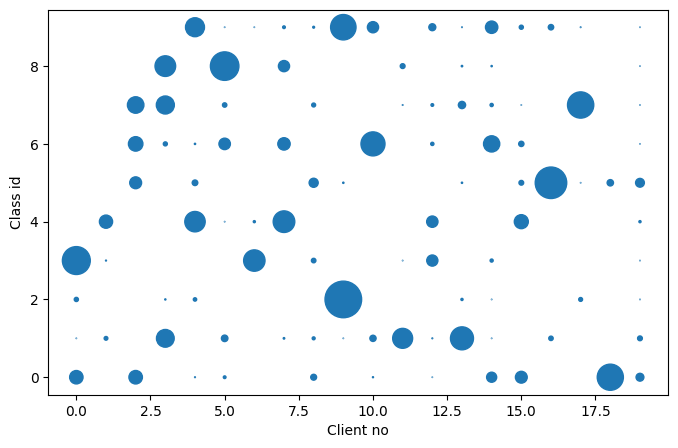

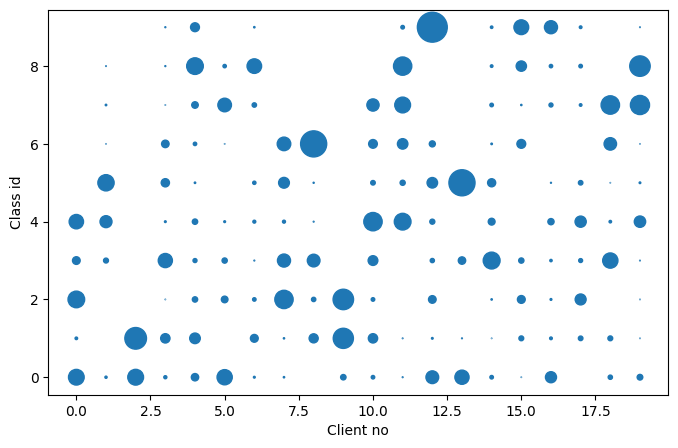

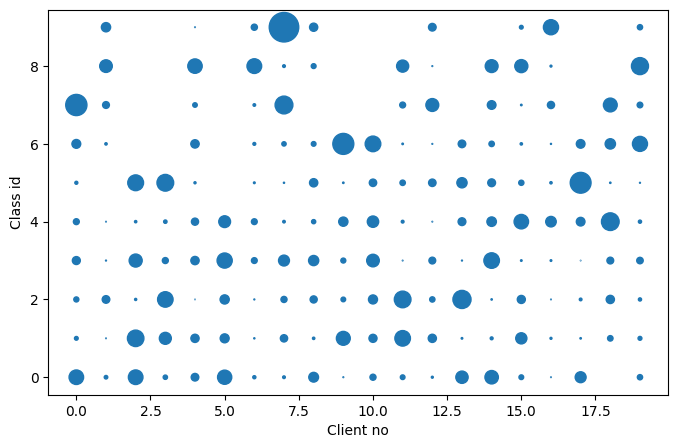

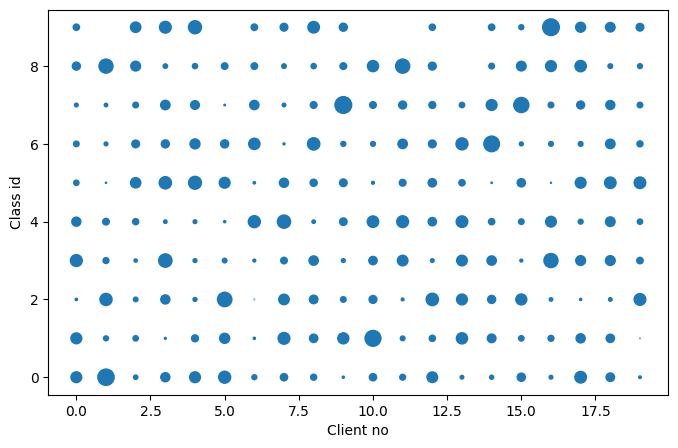

In [6]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plt.subplots_adjust(left=None, bottom=-0.1, right=None, top=None, wspace=0.1, hspace=None)

# plt.setp(
#     axes,
#     xticks=np.arange(20),
#     yticks=np.arange(10)
#     )

for i, alpha in enumerate(["01", "03", "05", "10"]):

    conf = json.load(open(f"../data/alpha/Cifar10_NIID_20c_a{alpha}/config.json", "r"))
    data = [dict(zip(np.array(cli)[:,0], np.array(cli)[:,1])) for cli in conf["Size of samples for labels in clients"]]

    idx = 0
    counts = []
    for client in conf['Size of samples for labels in clients']:
        count = np.sum(np.asarray(client), axis=0)[1]
        counts.append(count)
        idx +=1


    h = counts

    df = pd.DataFrame(data).replace(np.nan, 0)
    x = np.array(np.meshgrid(np.arange(20),np.arange(10))).T.reshape(-1,2)[:,0]
    y = np.array(np.meshgrid(np.arange(20),np.arange(10))).T.reshape(-1,2)[:,1]
    s = df.values.reshape(1,-1)[0].astype("int")
    s = (s)/(5000 - 0)*600

    # ax.grid()
    plt.figure(figsize=(8,5))
    plt.scatter(x,y,s)
    # plt.title(f"alpha: {float(alpha)/10}")
    plt.xlabel("Client no")
    plt.ylabel("Class id")
    plt.show()


# fig.suptitle("Label distribution of each client for different alpha configurations")
plt.show()